![title](https://i.imgur.com/0213Wbk.jpg)

# Projeto Final AceleraDev Data Science Squad5

## Objetivo

O objetivo deste desafio foi desenvolver um produto que conseguisse fornecer um serviço automatizado de recomendação de leads para um usuário dado sua atual lista de clientes (Portfólio).

## Contextualização

Algumas empresas gostariam de saber quem são as demais empresas em um determinado mercado (população) que tem maior probabilidade se tornarem seus próximos clientes, ou seja, encontrar no mercado quem são os leads mais aderentes dado as características dos clientes presentes no portfólio de um determinado usuário.

## Solução

Atualmente os sistemas de recomendação estão sendo aplicados em diversos segmentos do mercado. Seviços como Netflix, Spotify ou redes sociais como o Instagram, fazem extensivo uso de sistemas de recomendação para melhorar a experiencia dos seus usuários ou para criar novos produtos. Motivados pelas principais técnicas de *Machine Learning* utilizadas por estes serviços, desenvolvemos um sistema que soluciona de forma agnóstica este problema, ou seja, qualquer usuário com uma lista de clientes conseguirá receber recomendações de empresas similares ao seu portfólio.

Desenvolvemos um sistema, apresentado a seguir, que busca por similaridades nos dados, usando como principal forma de calcular estas similaridades a métrica de *Pairwise* da biblioteca Scikit-learn chamada `cosine_similarity`, ou "similaridade dos cossenos". Logo, o método utilizado é definido como *Memory-Based*.

![title](https://i.imgur.com/jgy0bXj.jpg)

## Importando bibliotecas que serão utilizadas

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm_notebook
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline 

plt.rc('font', family='arial', size=12)

## Importando dados e gerando amostragens

In [2]:
# Rebuild a dataframe using ids on portfolio
def rebuild_portfolio(estaticos_portfolio):
    full_portfolio = pd.DataFrame()
    for i in tqdm_notebook(estaticos_portfolio['id']):
        selected_id = estaticos_market[estaticos_market['id'].str.contains(i, na=False)]
        full_portfolio = pd.concat([full_portfolio, selected_id], ignore_index=True)
    
    return full_portfolio

In [3]:
# Import files
estaticos_market = pd.read_csv('workspace/data/estaticos_market.csv')
estaticos_portfolio1 = pd.read_csv('workspace/data/estaticos_portfolio1.csv')
estaticos_portfolio2 = pd.read_csv('workspace/data/estaticos_portfolio2.csv')
estaticos_portfolio3 = pd.read_csv('workspace/data/estaticos_portfolio3.csv')

# Portfolios 2 and 3 must be rebuild
#estaticos_portfolio2 = rebuild_portfolio(estaticos_portfolio2)

# Define portfolio to be used
portfolio = estaticos_portfolio1

estaticos_market_copy = estaticos_market.copy()

## Análise exploratória dos dados

In [4]:
print('Rows {} | Cols {}'.format(*estaticos_market.shape))

Rows 462298 | Cols 182


In [5]:
estaticos_market.dtypes

Unnamed: 0                                         int64
id                                                object
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                       

Porcentagem de valores nulos de cada *feature*:

In [6]:
def print_null_cols(df):
    for col in df.columns:
        nulls_value = df[col].isna().sum()
        percentage = 100*(nulls_value / df.shape[0])
        message = "Column {} has {} nulls / {}% ".format(col, nulls_value, percentage)
        print(message)
        
print_null_cols(estaticos_market)        

Column Unnamed: 0 has 0 nulls / 0.0% 
Column id has 0 nulls / 0.0% 
Column fl_matriz has 0 nulls / 0.0% 
Column de_natureza_juridica has 0 nulls / 0.0% 
Column sg_uf has 0 nulls / 0.0% 
Column natureza_juridica_macro has 0 nulls / 0.0% 
Column de_ramo has 0 nulls / 0.0% 
Column setor has 1927 nulls / 0.4168307022742906% 
Column idade_empresa_anos has 0 nulls / 0.0% 
Column idade_emp_cat has 0 nulls / 0.0% 
Column fl_me has 0 nulls / 0.0% 
Column fl_sa has 0 nulls / 0.0% 
Column fl_epp has 0 nulls / 0.0% 
Column fl_mei has 0 nulls / 0.0% 
Column fl_ltda has 0 nulls / 0.0% 
Column dt_situacao has 6 nulls / 0.0012978641482333905% 
Column fl_st_especial has 0 nulls / 0.0% 
Column fl_email has 0 nulls / 0.0% 
Column fl_telefone has 0 nulls / 0.0% 
Column fl_rm has 0 nulls / 0.0% 
Column nm_divisao has 1927 nulls / 0.4168307022742906% 
Column nm_segmento has 1927 nulls / 0.4168307022742906% 
Column fl_spa has 1927 nulls / 0.4168307022742906% 
Column fl_antt has 1927 nulls / 0.416830702274290

Column media_filiais_coligados has 441898 nulls / 95.58726189600647% 
Column max_filiais_coligados has 441898 nulls / 95.58726189600647% 
Column min_filiais_coligados has 441898 nulls / 95.58726189600647% 
Column qt_coligados_atividade_alto has 396907 nulls / 85.85522758047838% 
Column qt_coligados_atividade_medio has 396907 nulls / 85.85522758047838% 
Column qt_coligados_atividade_baixo has 396907 nulls / 85.85522758047838% 
Column qt_coligados_atividade_mt_baixo has 396907 nulls / 85.85522758047838% 
Column qt_coligados_atividade_inativo has 396907 nulls / 85.85522758047838% 
Column qt_coligadas has 412067 nulls / 89.13449766168142% 
Column sum_faturamento_estimado_coligadas has 412754 nulls / 89.28310310665415% 
Column de_faixa_faturamento_estimado has 27513 nulls / 5.951356051724212% 
Column de_faixa_faturamento_estimado_grupo has 27513 nulls / 5.951356051724212% 
Column vl_faturamento_estimado_aux has 27513 nulls / 5.951356051724212% 
Column vl_faturamento_estimado_grupo_aux has 2

Existem muitas colunas com um alto número de valores *nulls*. A princípio os valores *nulls* servem de informação em muitos casos para modelos de Machine Learning, mas remover as colunas com valores superires a 10% de nulls forneceu um resultado melhor para as recomendações ao utilizar **cosine_similarity**.

In [7]:
# Filter columns with less or equal to 10% nulls
def filter_null_10_porcent(col):
    nulls_value = estaticos_market[col].isna().sum()
    percentage = 100*(nulls_value / estaticos_market.shape[0])
    return percentage <= 10.0

col_filter = list(filter(filter_null_10_porcent, estaticos_market.columns))
col_filter

['Unnamed: 0',
 'id',
 'fl_matriz',
 'de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_empresa_anos',
 'idade_emp_cat',
 'fl_me',
 'fl_sa',
 'fl_epp',
 'fl_mei',
 'fl_ltda',
 'dt_situacao',
 'fl_st_especial',
 'fl_email',
 'fl_telefone',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_spa',
 'fl_antt',
 'fl_veiculo',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'nu_meses_rescencia',
 'de_nivel_atividade',
 'fl_simples_irregular',
 'fl_passivel_iss',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo',
 'vl_faturamento_estimado_aux',
 'vl_faturamento_estimado_grupo_aux',
 'qt_filiais']

In [8]:
estaticos_market_filter = estaticos_market[col_filter]
print('Rows {} | Cols {}'.format(*estaticos_market_filter.shape))

Rows 462298 | Cols 39


In [9]:
estaticos_market_filter.dtypes

Unnamed: 0                               int64
id                                      object
fl_matriz                                 bool
de_natureza_juridica                    object
sg_uf                                   object
natureza_juridica_macro                 object
de_ramo                                 object
setor                                   object
idade_empresa_anos                     float64
idade_emp_cat                           object
fl_me                                     bool
fl_sa                                     bool
fl_epp                                    bool
fl_mei                                    bool
fl_ltda                                   bool
dt_situacao                             object
fl_st_especial                            bool
fl_email                                  bool
fl_telefone                               bool
fl_rm                                   object
nm_divisao                              object
nm_segmento  

Descrição estatística dos dados numéricos:

In [10]:
estaticos_market_filter.describe()

,Unnamed: 0,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
count,462298.00000,462298.000000,460371.000000,460371.000000,417022.000000,4.347850e+05,4.347850e+05,462298.000000
mean,231148.50000,9.948677,3.591801,48.699177,25.007247,8.020911e+05,3.367205e+08,28.737044
std,133454.08171,9.615664,72.600352,1206.696804,9.679799,3.099979e+07,7.114614e+09,468.626094
min,0.00000,0.016438,0.000000,0.000000,0.000000,0.000000e+00,4.104703e+04,0.000000
25%,115574.25000,2.756164,0.000000,0.000000,22.000000,1.648512e+05,1.854576e+05,0.000000
50%,231148.50000,6.704110,0.000000,0.000000,23.000000,2.100000e+05,2.100000e+05,0.000000
75%,346722.75000,14.465753,0.000000,0.000000,25.000000,2.100000e+05,2.100000e+05,0.000000
max,462297.00000,106.432877,9782.000000,122090.000000,66.000000,1.454662e+10,2.227618e+11,9647.000000


Filtranto apenas colunas do tipo numérica:

In [11]:
def filter_col_numbers(col):
    dtype = estaticos_market_filter[col].dtypes
    return dtype == np.dtype('int64') or dtype == np.dtype('float64')

col_filter_number = list(filter(filter_col_numbers, estaticos_market_filter.columns))
col_filter_number

['Unnamed: 0',
 'idade_empresa_anos',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'nu_meses_rescencia',
 'vl_faturamento_estimado_aux',
 'vl_faturamento_estimado_grupo_aux',
 'qt_filiais']

Analisando a distribuição de cada coluna do tipo numérica:

----- idade_empresa_anos -----


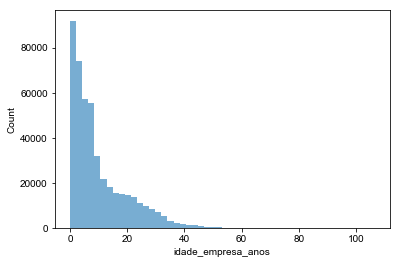

----- vl_total_veiculos_pesados_grupo -----


C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


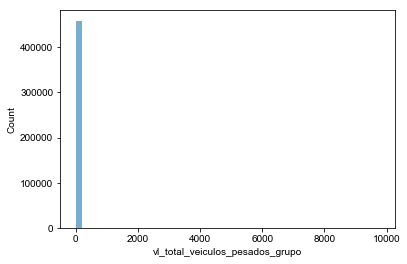

----- vl_total_veiculos_leves_grupo -----


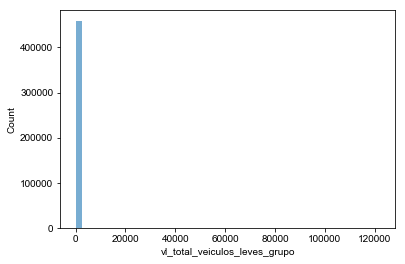

----- nu_meses_rescencia -----


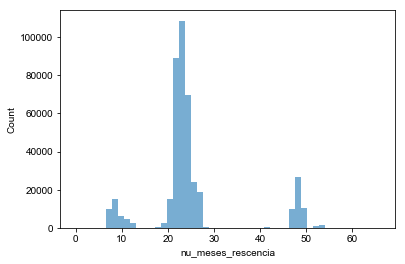

----- vl_faturamento_estimado_aux -----


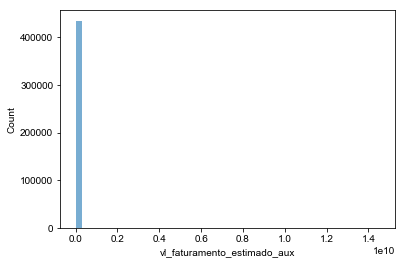

----- vl_faturamento_estimado_grupo_aux -----


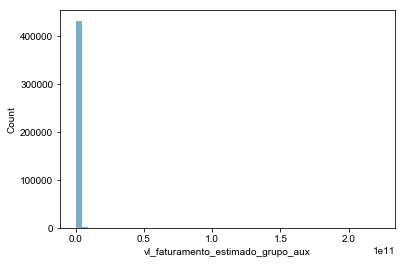

----- qt_filiais -----


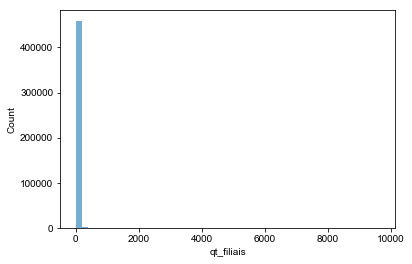

In [12]:
for col in col_filter_number[1:]:
    print(f"----- {col} -----")
    plt.hist(estaticos_market_filter[col], bins=50, alpha=0.6)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


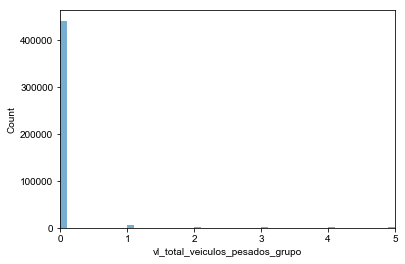

In [13]:
data = estaticos_market_filter[col_filter_number[2]].values

plt.hist(data[data<=5], bins=50, alpha=0.6)
plt.xlabel(col_filter_number[2])
plt.ylabel("Count")
plt.xlim(0,5)
plt.show()

Nota-se que apenas as colunas `nu_meses_rescencia` e `idade_empresa_anos` tem uma distribuição sem outliers. 

Abaixo exclui-se as demais colunas numéricas.

In [14]:
for col in col_filter_number:
    if col not in ["nu_meses_rescencia", "idade_empresa_anos"]:
        estaticos_market_filter.drop([col], axis=1, inplace=True)
        
estaticos_market_filter.describe()        

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,idade_empresa_anos,nu_meses_rescencia
count,462298.000000,417022.000000
mean,9.948677,25.007247
std,9.615664,9.679799
min,0.016438,0.000000
25%,2.756164,22.000000
50%,6.704110,23.000000
75%,14.465753,25.000000
max,106.432877,66.000000


Analisando a distribuição das colunas `nu_meses_rescencia` e `idade_empresa_anos`

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


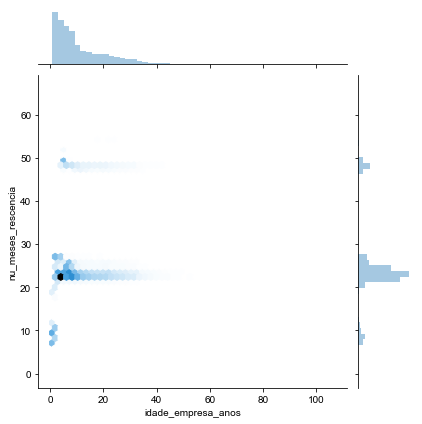

In [15]:
sns.jointplot(x="idade_empresa_anos", y="nu_meses_rescencia", 
              data=estaticos_market_filter, kind="hex");
plt.show()

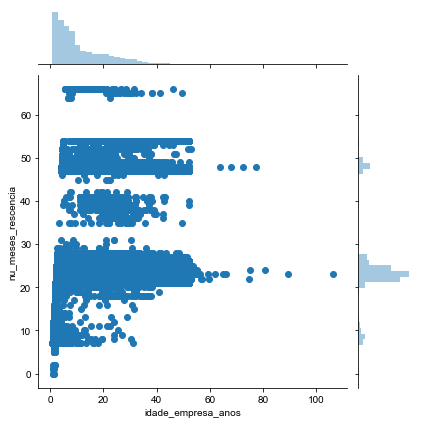

In [16]:
sns.jointplot(x="idade_empresa_anos", y="nu_meses_rescencia", 
              data=estaticos_market_filter);
plt.show()

In [17]:
estaticos_market_filter.dtypes

id                                      object
fl_matriz                                 bool
de_natureza_juridica                    object
sg_uf                                   object
natureza_juridica_macro                 object
de_ramo                                 object
setor                                   object
idade_empresa_anos                     float64
idade_emp_cat                           object
fl_me                                     bool
fl_sa                                     bool
fl_epp                                    bool
fl_mei                                    bool
fl_ltda                                   bool
dt_situacao                             object
fl_st_especial                            bool
fl_email                                  bool
fl_telefone                               bool
fl_rm                                   object
nm_divisao                              object
nm_segmento                             object
fl_spa       

## Tratamento dos dados

Agora vamos analisar o percentual de respostas de cada coluna não numerica. Observe que muitas colunas tem uma resposta predominante. Essas colunas não irão agregar valor ao modelo, portanto vamos excluir tais colunas.

In [18]:
for col in estaticos_market_filter.columns:
    if col not in ["nu_meses_rescencia","idade_empresa_anos", "id"]:
        print(f" ----- {col} ----- ")
        print(100 * (estaticos_market_filter[col].value_counts() / estaticos_market_filter.shape[0]))

 ----- fl_matriz ----- 
True     93.712713
False     6.287287
Name: fl_matriz, dtype: float64
 ----- de_natureza_juridica ----- 
EMPRESARIO INDIVIDUAL                                                     63.975185
SOCIEDADE EMPRESARIA LIMITADA                                             19.734241
ASSOCIACAO PRIVADA                                                         6.423130
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA     3.284245
ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO                                 1.579284
ORGANIZACAO RELIGIOSA                                                      0.629031
SOCIEDADE ANONIMA FECHADA                                                  0.475018
CONDOMINIO EDILICIO                                                        0.450791
ENTIDADE SINDICAL                                                          0.381356
CANDIDATO A CARGO POLITICO ELETIVO                                         0.349774
SOCIEDADE SIMPLES LIMITADA     

 ----- idade_emp_cat ----- 
1 a 5      29.976336
5 a 10     25.113671
> 20       16.347032
10 a 15    10.643568
<= 1       10.122042
15 a 20     7.797351
Name: idade_emp_cat, dtype: float64
 ----- fl_me ----- 
False    99.737183
True      0.262817
Name: fl_me, dtype: float64
 ----- fl_sa ----- 
False    98.176068
True      1.823932
Name: fl_sa, dtype: float64
 ----- fl_epp ----- 
False    100.0
Name: fl_epp, dtype: float64
 ----- fl_mei ----- 
False    67.358717
True     32.641283
Name: fl_mei, dtype: float64
 ----- fl_ltda ----- 
False    99.731342
True      0.268658
Name: fl_ltda, dtype: float64
 ----- dt_situacao ----- 
2005-11-03    15.026022
2006-12-21     0.477398
2006-12-01     0.436515
2010-05-15     0.389143
2005-09-24     0.329441
1998-07-28     0.322303
2006-12-02     0.310622
2005-08-27     0.300888
2004-10-30     0.206360
2001-07-01     0.192949
2003-10-18     0.185378
2004-10-16     0.173265
2006-03-08     0.168290
2018-08-14     0.128705
2018-08-13     0.123513
2006-03-0

Name: nm_divisao, Length: 87, dtype: float64
 ----- nm_segmento ----- 
COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS           45.690009
OUTRAS ATIVIDADES DE SERVICOS                                        12.883681
INDUSTRIAS DE TRANSFORMACAO                                           6.915020
ALOJAMENTO E ALIMENTACAO                                              6.528257
CONSTRUCAO                                                            5.486288
ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES                  4.613042
ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS                       3.757533
TRANSPORTE ARMAZENAGEM E CORREIO                                      3.349571
EDUCACAO                                                              2.446690
SAUDE HUMANA E SERVICOS SOCIAIS                                       2.193174
ARTES CULTURA ESPORTE E RECREACAO                                     1.190358
INFORMACAO E COMUNICACAO                                    

In [19]:
# Lista de colunas a serem excluidas
col_exclude = ["fl_matriz", "fl_me", "fl_sa", "fl_epp", "fl_ltda", "fl_st_especial", "fl_spa", "fl_antt",
              "fl_veiculo", "fl_simples_irregular"]

estaticos_market_filter.drop(col_exclude, axis=1, inplace=True)
print('Rows {} | Cols {}'.format(*estaticos_market_filter.shape))

Rows 462298 | Cols 23


In [20]:
print_null_cols(estaticos_market_filter) 

Column id has 0 nulls / 0.0% 
Column de_natureza_juridica has 0 nulls / 0.0% 
Column sg_uf has 0 nulls / 0.0% 
Column natureza_juridica_macro has 0 nulls / 0.0% 
Column de_ramo has 0 nulls / 0.0% 
Column setor has 1927 nulls / 0.4168307022742906% 
Column idade_empresa_anos has 0 nulls / 0.0% 
Column idade_emp_cat has 0 nulls / 0.0% 
Column fl_mei has 0 nulls / 0.0% 
Column dt_situacao has 6 nulls / 0.0012978641482333905% 
Column fl_email has 0 nulls / 0.0% 
Column fl_telefone has 0 nulls / 0.0% 
Column fl_rm has 0 nulls / 0.0% 
Column nm_divisao has 1927 nulls / 0.4168307022742906% 
Column nm_segmento has 1927 nulls / 0.4168307022742906% 
Column sg_uf_matriz has 1939 nulls / 0.41942643057075735% 
Column de_saude_tributaria has 14851 nulls / 3.2124300775690138% 
Column de_saude_rescencia has 14851 nulls / 3.2124300775690138% 
Column nu_meses_rescencia has 45276 nulls / 9.793682862569165% 
Column de_nivel_atividade has 11168 nulls / 2.4157578012450847% 
Column fl_passivel_iss has 1927 nu

In [21]:
sum(estaticos_market_filter['nu_meses_rescencia'] == 0)

4

Completamos os valores faltantes dos dados com zeros. Como apenas a coluna numérica `nu_meses_rescencia` tem dados faltantes e apenas 4 linha de todo o conjunto dos dados tem valor zero, esse preenchimento pode ser uma boa alternativa.

Já as demais colunas com dados faltantes são categóricas, então o zero entraria para enfatizar que a empresa não passou tal informação.

In [22]:
estaticos_market_filter = estaticos_market_filter.fillna(0)
print_null_cols(estaticos_market_filter) 

Column id has 0 nulls / 0.0% 
Column de_natureza_juridica has 0 nulls / 0.0% 
Column sg_uf has 0 nulls / 0.0% 
Column natureza_juridica_macro has 0 nulls / 0.0% 
Column de_ramo has 0 nulls / 0.0% 
Column setor has 0 nulls / 0.0% 
Column idade_empresa_anos has 0 nulls / 0.0% 
Column idade_emp_cat has 0 nulls / 0.0% 
Column fl_mei has 0 nulls / 0.0% 
Column dt_situacao has 0 nulls / 0.0% 
Column fl_email has 0 nulls / 0.0% 
Column fl_telefone has 0 nulls / 0.0% 
Column fl_rm has 0 nulls / 0.0% 
Column nm_divisao has 0 nulls / 0.0% 
Column nm_segmento has 0 nulls / 0.0% 
Column sg_uf_matriz has 0 nulls / 0.0% 
Column de_saude_tributaria has 0 nulls / 0.0% 
Column de_saude_rescencia has 0 nulls / 0.0% 
Column nu_meses_rescencia has 0 nulls / 0.0% 
Column de_nivel_atividade has 0 nulls / 0.0% 
Column fl_passivel_iss has 0 nulls / 0.0% 
Column de_faixa_faturamento_estimado has 0 nulls / 0.0% 
Column de_faixa_faturamento_estimado_grupo has 0 nulls / 0.0% 


Abaixo está uma lista de *features* identificadas como categorias. Vamos utilizar esta lista para converter as *features* para categorias.

In [23]:
for col in estaticos_market_filter.columns:
    if col not in ["nu_meses_rescencia","idade_empresa_anos", "id"]:
        try:
            estaticos_market_filter[col] = estaticos_market_filter[col].astype('category')
            estaticos_market_filter[col] = estaticos_market_filter[col].cat.codes
            estaticos_market_filter[col] = estaticos_market_filter[col].astype('int')

        except KeyError:
            pass

In [24]:
estaticos_market_filter.describe()

,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_mei,dt_situacao,fl_email,...,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,...,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000
mean,25.368922,2.693442,4.152696,12.867036,3.403813,9.948677,2.238026,0.326413,4826.468734,0.445751,...,35.766981,11.201705,13.016403,3.025793,1.313676,22.558116,2.114818,0.572663,7.908687,7.645250
std,18.805287,1.412396,1.323293,9.777025,1.437760,9.615664,1.837414,0.468901,1659.580128,0.497049,...,22.513477,4.419504,6.972654,1.658145,1.034165,11.822430,0.962411,0.494692,4.179272,4.189274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.016438,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,3.000000,5.000000,2.000000,2.756164,0.000000,0.000000,3002.000000,0.000000,...,29.000000,10.000000,10.000000,2.000000,1.000000,22.000000,1.000000,0.000000,2.000000,2.000000
50%,17.000000,3.000000,5.000000,5.000000,3.000000,6.704110,3.000000,0.000000,4948.000000,0.000000,...,31.000000,10.000000,16.000000,3.000000,1.000000,23.000000,2.000000,1.000000,11.000000,11.000000
75%,17.000000,4.000000,5.000000,22.000000,5.000000,14.465753,4.000000,1.000000,6352.000000,1.000000,...,37.000000,14.000000,20.000000,5.000000,1.000000,25.000000,3.000000,1.000000,11.000000,11.000000
max,66.000000,5.000000,6.000000,32.000000,5.000000,106.432877,5.000000,1.000000,7334.000000,1.000000,...,87.000000,21.000000,27.000000,6.000000,5.000000,66.000000,4.000000,1.000000,12.000000,11.000000


In [25]:
# Make a copy of the main df, we gonna need it later to get the 'ids' in the end.
estaticos_market_filter_raw = estaticos_market_filter.copy()

try:
    estaticos_market_filter.drop(['id'], axis=1, inplace=True)
    
except KeyError:
    pass

Precisamos utilizar um processo de *Feature Scaling* para normalizar os dados, isto permite que todas as *features* fiquem em uma unidade de medida equivalente e isso facilita o cálculo de distância que iremos utilizar.

In [26]:
estaticos_market_filter_columns = estaticos_market_filter.columns # save column names
estaticos_market_filter = preprocessing.scale(estaticos_market_filter) # feature scaling

## Sistema de recomendação

A função `get_recommendations` recebe um id de uma empresa e calcula a distância dos dados usando `cosine_similarity` em relação a população inteira, retornando os outros id's mais próximos, ou seja, outras empresas similares com o id fornecido para a função.


In [27]:
titles = estaticos_market_filter_raw['id']
indices = pd.Series(estaticos_market_filter_raw.index, index=estaticos_market_filter_raw['id'])

# Get recommendations
def get_recommendations(id_n):
    idx = indices[id_n]
    cosine_sim = cosine_similarity(estaticos_market_filter[idx:idx+1], estaticos_market_filter)
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    all_scores = np.array(sim_scores[1:]) # All cosine distances id vs. market
    sim_scores = np.array(sim_scores[1:1000]) # Number of recomendations per id
    return titles.iloc[sim_scores[:,0]], sim_scores[:,1], all_scores[:,1]


## Gerando recomendações

Aplicamos a função `get_recommendations` para cada id do portfólio do cliente e armazenamos as informações geradas.

In [28]:
rec_list = []
score_mean_list = []
score_max_list = []
score_min_list = []
first_run = True
for i in tqdm_notebook(portfolio['id']):
    id_empresa, scores, all_scores = get_recommendations(i)
    score_mean = scores.mean()
    score_max = scores.max()
    score_min = scores.min()
    score_mean_list.append(score_mean)
    score_max_list.append(score_max)
    score_min_list.append(score_min)
    if first_run == True:
        all_scores_result = all_scores
        first_run = False
    all_scores_result = (all_scores_result + all_scores) / 2
    for x, y in zip(id_empresa, scores):
        rec_list.append(x)
        
counter=collections.Counter(rec_list)

Uma forma de verificar se as recomendações geradas estão fazendo sentido é checar quantas empresas, que já pertenciam ao portfólio, foram recomendadas novamente pelo algoritmo. Este *overlap* de empresas que já estavam no portfólio e aparecem novamente nas recomendações, indica que o algoritmo está selecionando de fato empresas similares.

In [29]:
check_match = []
for i in portfolio['id']:    
    if i in rec_list:
        check_match.append(i)
        
overlap_rec = len(check_match)/len(portfolio['id'])

print('Porcentagem do portfólio que apareceu nas recomendações: {}%'.format(round(overlap_rec, 2)*100))

Porcentagem do portfólio que apareceu nas recomendações: 85.0%


Em seguida, removemos as empresas que já pertenciam ao portfólio para gerar as recomendações de leads finais.

In [30]:
# Remove duplicates portfolio x recommendations
for i in portfolio['id']:
    if i in counter:
        del counter[i]

A variável `counter` reúne todas as recomendações geradas por ordem de ocorrência. Assim, podemos selecionar os id's que apareceram mais vezes nas recomendações.

In [31]:
number_recommendations = 500 # How many final recommendations we want?
most_commom = counter.most_common(number_recommendations)

recommendations = [x[0] for x in most_commom]
recommendations_sums = [x[1] for x in most_commom]

**Recomendações geradas**

A variável `recommendations` reúne as recomendações finais geradas com base no portfólio em análise.

In [32]:
recommendations

['c2de3f68c69ef7953ee8bb93798be863a25fbb777b4e0d9def5e53dfb4294651',
 '1bcb812e5a72dc05fb0e158e2e625ac0f12550ed91b832e5bee79ad53ea0e4c5',
 '56e8f24286a466529711f482b6a938f0742ce99cbcb384f72a3e777bd3d484bf',
 '969e72f6f733cac287dbf01d545b809df743b30d157d6cfc934f02ef8958094f',
 'c247e83238e3b5d9f9f033c84960856c8db62e2a6271b780ebbb1f1b910eb244',
 'b4d01d6ca451d799be1b933ad3d11f79fa16a8d51c1018ab6ee1c3fbbc1e7736',
 '57a9537c903b848b34544b3de39a001df42b6c2a44f6e786e1ca213939db8cc2',
 '42806cb9da409f4d5ce9d7f134e83629de2283ad5defacb73ce78fe64c1bd29f',
 '89675fe79493df0b77c288870f4d59eeb65f480992e557b7866ef5346a02b2d0',
 'f26f6743caeecfd46ba03996a35a938a38749be540a3d591d0c56605c5b74de3',
 '196b024075b61f802c43c55e09204a2361f780ea52ead3e5b08acb8629fa2f19',
 'b68c2d0dd6fa016dadf9c4d0473dba91310fc25b1a16c8fa579e1ee5aaf97df5',
 '5f21ca03212e91a2e81934e0728bc0967ccce43c6db696b1194780e4fddeb63c',
 '3be4ed9797be266611851aa7910a76bfdc1a43f084803435fb68d99329f008c4',
 'c795804564692d9089dd8a602fddc2bb

## Avaliando a performance

Conseguimos verificar a **média das distancias dos cossenos** de nossas recomendações em relação ao porfólio, mostrando se as recomendações geradas possuem um bom **matching**. Quanto mais próximo de 1, mais similar são as recomendações em relação ao portfólio.

In [33]:
mean_score_recommendations = sum(score_mean_list)/len(score_mean_list)
min_score_recommendations = min(score_min_list)
max_score_recommendations = max(score_max_list)

print('Valor Mínimo Cosseno Recomendações: {}'.format(min_score_recommendations))
print('Valor Máximo Cosseno Recomendações: {}'.format(max_score_recommendations))
print('Distância Média Cosseno Recomendações: {}'.format(mean_score_recommendations))

Valor Mínimo Cosseno Recomendações: 0.625707808499161
Valor Máximo Cosseno Recomendações: 1.0000000000000002
Distância Média Cosseno Recomendações: 0.8977437849953658


No gráfico abaixo é possível visualizar a **média da distância dos cossenos** do portfólio em relação a população. A área em "Laranja" representa as empresas mais similares escolhidas como recomendação.

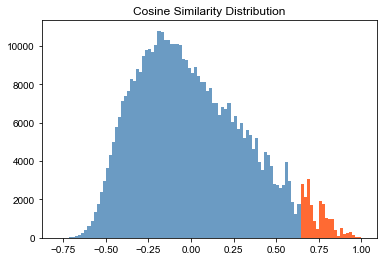

In [34]:
fig, ax = plt.subplots()

N, bins, patches = ax.hist(all_scores_result,bins=100, alpha=0.8)

counter = 0
for i in range(0, len(patches)):
    xy = patches[i].xy[0]
    if xy < min_score_recommendations:        
        counter = counter + 1
    else:
        continue

for i in range(0,counter):
    patches[i].set_facecolor('steelblue')
for i in range(counter, len(patches)):
    patches[i].set_facecolor('orangered')

plt.title('Cosine Similarity Distribution')
plt.show()

Uma boa métrica para saber se as recomendações geradas estão fazendo sentido é a **distância média dos cossenos das recomendações**. Quanto mais próximo de 1, mais similar as recomendações em relação ao portfólio:

In [35]:
print('Distância Média Cosseno Recomendações: {}'.format(mean_score_recommendations))

Distância Média Cosseno Recomendações: 0.8977437849953658


## Visualização dos resultados

Podemos analisar algumas *features* das empresas do Portfólio em relação as Recomendações geradas para ter uma comparação visual das recomendações geradas pelo algoritmo.

Abaixo conseguimos ver uma comparação do **Portfólio vs. Recomendações**:

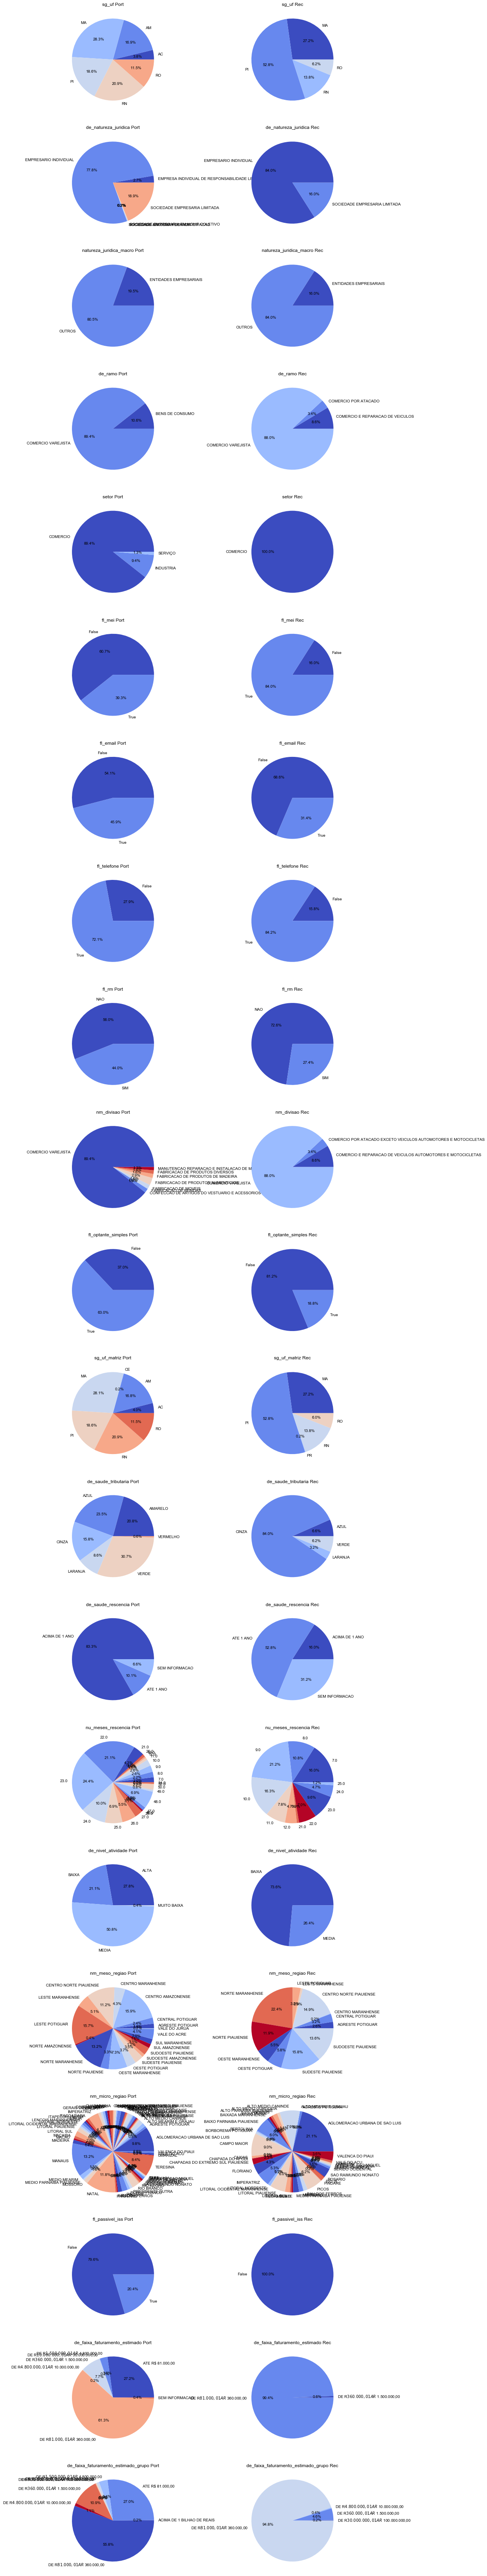

In [36]:
df_rec = estaticos_market_copy[estaticos_market_copy['id'].isin(recommendations)]

list_features = ['sg_uf', 'de_natureza_juridica', 'natureza_juridica_macro', 'de_ramo', 'setor', 'fl_mei', 'fl_email', 'fl_telefone', 'fl_rm', 'nm_divisao', 'fl_optante_simples', 'sg_uf_matriz', 'de_saude_tributaria', 'de_saude_rescencia', 'nu_meses_rescencia', 'de_nivel_atividade', 'nm_meso_regiao', 'nm_micro_regiao', 'fl_passivel_iss', 'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo']

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

fig, axs = plt.subplots(len(list_features), 2, figsize=(15, 120), sharey=True)

position = 0
for i in list_features:
    data1 = portfolio.groupby(i)['id'].nunique()
    data2 = df_rec.groupby(i)['id'].nunique()
    names1 = list(data1.keys())
    values1 = list(data1.values)
    names2 = list(data2.keys())
    values2 = list(data2.values)
    
    axs[position, 0].pie(data1, labels=names1, autopct='%1.1f%%', colors=colors)
    axs[position, 0].set_title('%s Port' % i)
    axs[position, 1].pie(data2, labels=names2, autopct='%1.1f%%', colors=colors)
    axs[position, 1].set_title('%s Rec' % i)
    
    position = position + 1

plt.show()

# Conclusões finais

O modelo apresentado conseguiu fornecer recomendações relevantes com base no portfólio fornecido. Esta é uma solução totalmente baseada no cálculo de distancia dos dados, tornado-a rápida, eficiente e agnóstica para o desenvolvimento de um futuro produto.

Mesmo os usuários que possuam um pequeno portfólio de empresas, esses conseguirão receber recomendações de outras empresas similares, se beneficiando do serviço.

Por não ser necessário realizar treinamento, problemas como *underfitting* ou *overfitting* não fazem sentido nesta solução. Em um produto para usuários finais pode ser utilizado um *threshold* na distância dos cossenos, a fim de definir um limite de similaridade para as recomendações caso seja necessário.

## Veja também

Uma versão para produção do sistema de recomendação aqui apresentado está disponível em https://github.com/codenation-dev/squad-5-ad-data-science-1